In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
%matplotlib inline

# Preprocessing

### Axial Angle vs. Powers and Deflecions in Other Directions

In [339]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast.csv')

### Axial Anglular Velocity vs. Powers and Deflecions in Other Directions

In [340]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_2.csv')

### ABS(Axial Anglular Velocity) vs. Powers and Deflecions in Other Directions

In [341]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_3.csv')

### ABS(Axial Anglular Velocity) vs. Total Power and Deflecions in Other Directions

In [342]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_4.csv')

### ABS(Axial Anglular Velocity) vs. (1 + Deflecions in Other Directions) * Total Power

In [343]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_5.csv')

### ABS(Axial Anglular Velocity) vs. (1 + Deflecions in Other Directions) * Total Force

In [344]:
data = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_6.csv')

### Prediction set

In [345]:
data_pred = pd.read_csv('https://raw.githubusercontent.com/HongEricTang/AxialMuscle/master/Stern_mast/stern_mast_pred.csv')

# Smoothing noisy data

In [346]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [347]:
def smoothTriangle(data, degree):
    smooth = []
    length = len(data)
    for i in range(0,degree):
        average = sum(data[i:i+degree])/degree
        smooth.append(average)
    for i in range(degree,length-degree):
        average = sum(data[i-degree:i+degree])/(2*degree)
        smooth.append(average)
    for i in range(length-degree,length):
        average = sum(data[i-degree:i])/degree
        smooth.append(average)
    return smooth
degree = 50

# Retrieve training data

In [348]:
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]
df_pred = data_pred.iloc[:,1:]
df_x.iloc[:,0]

0        42.950943
1        42.949332
2        42.947999
3        42.945142
4        42.973447
           ...    
13995    56.759538
13996    56.762966
13997    56.777482
13998    56.790443
13999    56.513328
Name: total_force, Length: 14000, dtype: float64

In [349]:
df_x = df_x.values 
df_x[:,0]

array([42.95094306, 42.94933161, 42.94799939, ..., 56.77748195,
       56.79044259, 56.51332827])

In [350]:
df_y = df_y.values

In [351]:
df_pred = df_pred.values

# Min-Max scaling

In [352]:
# scaler = StandardScaler().fit(df_x)
# x_scaled = scaler.transform(df_x)
# pred_scaled = scaler.transform(df_pred)
df_x[:,0] = df_x[:,0]/max(df_x[:,0])
df_x[:,1] = df_x[:,1]/max(df_x[:,1])
df_x[:,2] = df_x[:,2]/max(df_x[:,2])
df_pred[:,0] = df_pred[:,0]/max(df_pred[:,0])

In [353]:
x_smooth = np.zeros(x_scaled.shape)
for i in range(df_x.shape[1]):
    column = df_x[:,i]
    x_smooth[:,i] = smoothTriangle(column, degree)
pred_smooth = np.zeros(df_pred.shape)
for i in range(df_pred.shape[1]):
    column = df_pred[:,i]
    pred_smooth[:,i] = smoothTriangle(column, degree)

(0, 1)

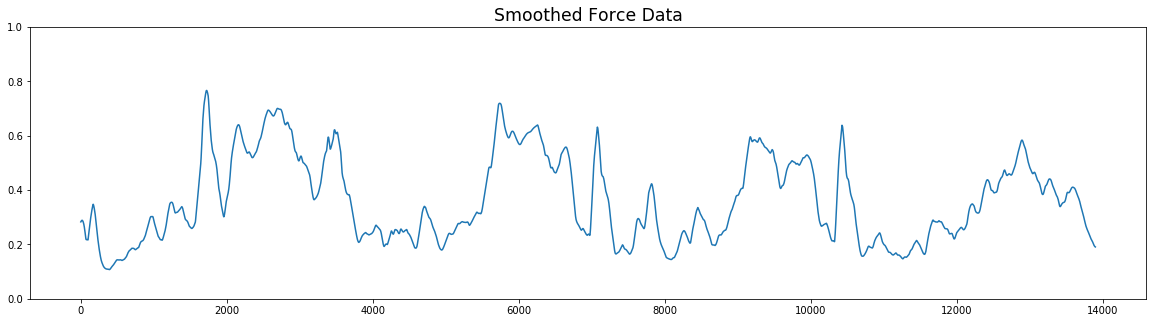

In [354]:
plt.figure(figsize=(20, 5))
plt.plot(x_smooth[degree:-degree,0])
plt.title('Smoothed Force Data', fontsize = 'xx-large')
plt.ylim(0, 1)

(0, 1)

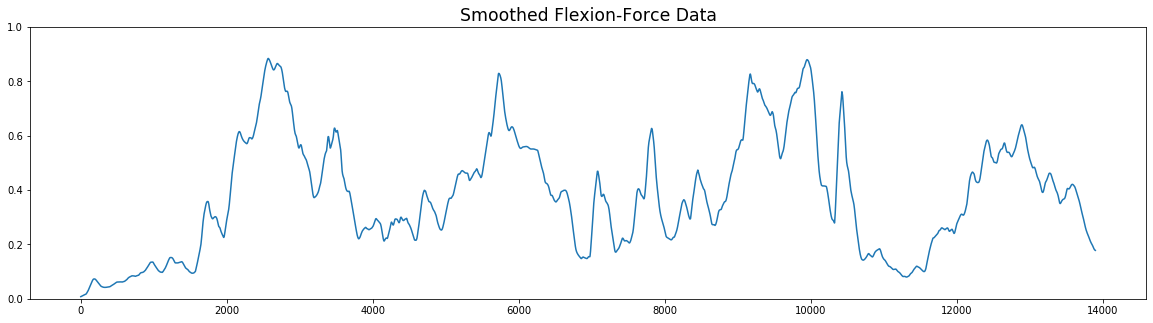

In [355]:
plt.figure(figsize=(20, 5))
plt.plot(x_smooth[degree:-degree,1])
plt.title('Smoothed Flexion-Force Data', fontsize = 'xx-large')
plt.ylim(0,1)

(0, 1)

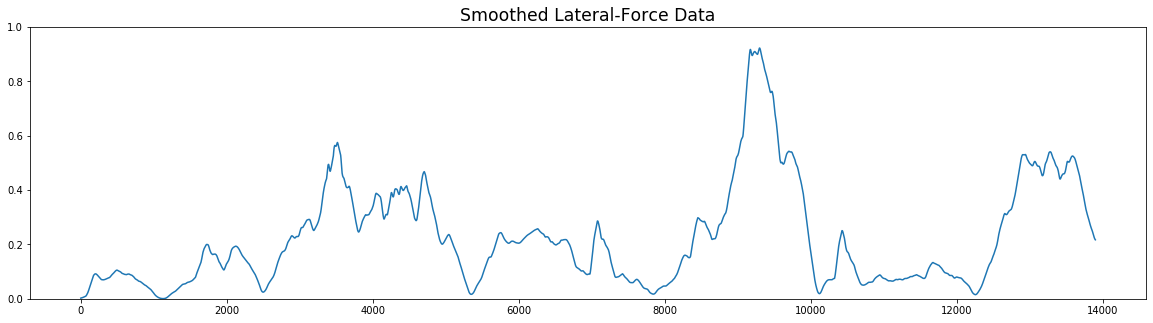

In [356]:
plt.figure(figsize=(20, 5))
plt.plot(x_smooth[degree:-degree,2])
plt.title('Smoothed Lateral-Force Data', fontsize = 'xx-large')
plt.ylim(0,1)

In [357]:
total = [0]*len(df_y)
for i in range(len(df_y)):
    total[i] = x_smooth[i,0] + x_smooth[i,1] + x_smooth[i,2]

In [358]:
df_x_smooth = pd.DataFrame(x_smooth[degree:-degree,:])
pred_x_smooth = pd.DataFrame(pred_smooth[degree:-degree,:])
pred_x_smooth

,0,1,2
0,0.283009,0.0,0.0
1,0.283568,0.0,0.0
2,0.284108,0.0,0.0
3,0.284625,0.0,0.0
4,0.285107,0.0,0.0
...,...,...,...
13895,0.191514,0.0,0.0
13896,0.191317,0.0,0.0
13897,0.191132,0.0,0.0
13898,0.190958,0.0,0.0


In [359]:
y_smooth = smoothTriangle(df_y, degree)
for i in range(len(y_smooth)):
    y_smooth[i] = 300*y_smooth[i]

(0, 3)

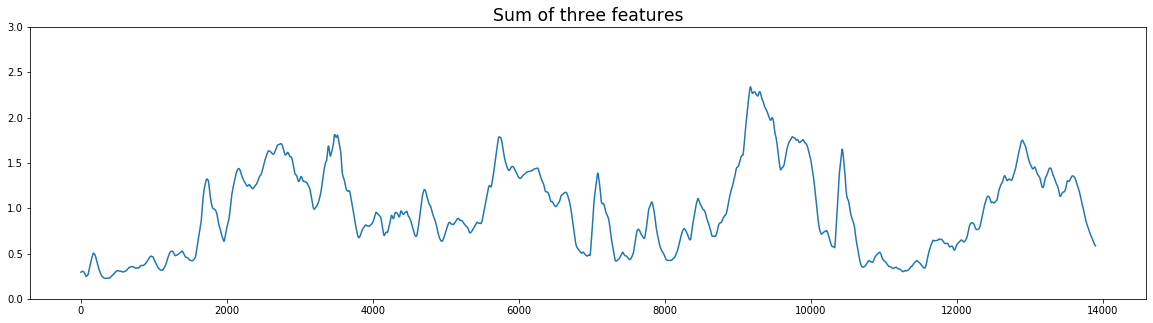

In [360]:
plt.figure(figsize=(20, 5))
plt.plot(total[degree:-degree])
plt.title('Sum of three features', fontsize = 'xx-large')
plt.ylim(0,3)

(0, 1)

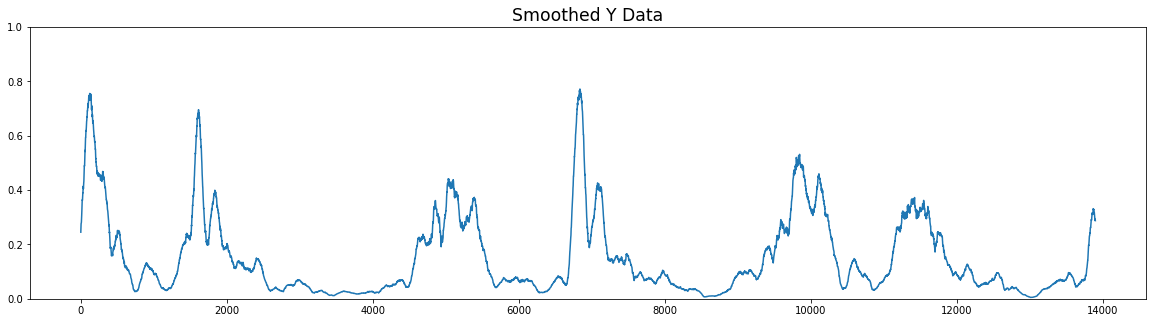

In [361]:
plt.figure(figsize=(20, 5))
plt.plot(y_smooth[degree:-degree])
plt.title('Smoothed Y Data', fontsize = 'xx-large')
plt.ylim(0, 1)

(0, 0.006)

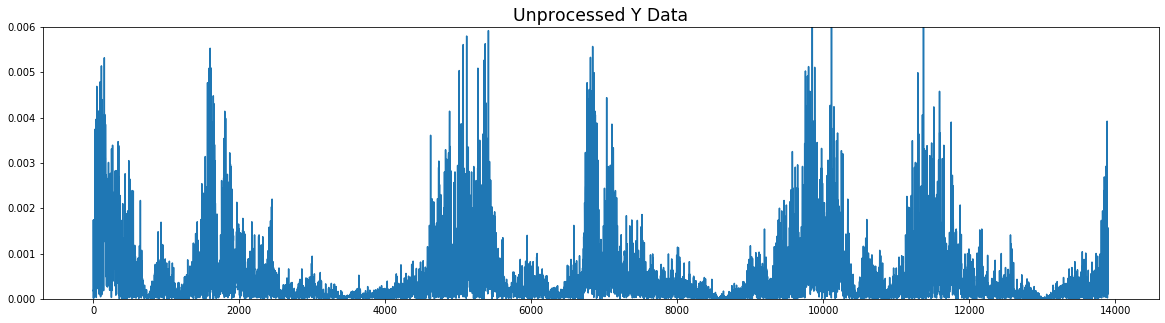

In [362]:
plt.figure(figsize=(20, 5))
plt.plot(df_y[degree:-degree])
plt.title('Unprocessed Y Data', fontsize = 'xx-large')
plt.ylim(0, 0.006)

In [363]:
df_y_smooth = pd.DataFrame(y_smooth[degree:-degree])
df_y_smooth

,0
0,0.245079
1,0.256635
2,0.264669
3,0.271293
4,0.275994
...,...
13895,0.289530
13896,0.293040
13897,0.290910
13898,0.288330


In [364]:
x_train, x_test, y_train, y_test = train_test_split(df_x_smooth, df_y_smooth, test_size = 0.2, shuffle = False)

# Neural Network

### Logistic

Activation function = Logistic; Optimizer = lbfgs

In [369]:
nn2 = MLPRegressor(activation = 'logistic', solver = 'lbfgs', hidden_layer_sizes = (10,10,10), random_state = 1, max_iter = 80)

### ReLU

Activation function = Rectified linear unit; Optimizer = lbfgs

In [385]:
nn = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (15,15,15), random_state = 1, max_iter = 250)

### Keras

Activation function = Rectified linear unit; Optimizer = adam; Loss function = Mean absolute percentage error

In [225]:
model2 = keras.Sequential()

model2.add(keras.Input(shape=(3,)))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(1, activation='relu'))

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.MeanAbsolutePercentageError())
model2.fit(x_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
11120/11120 [==============================] - 0s 30us/sample - loss: 55.4309
Epoch 2/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 49.7914
Epoch 3/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 47.9100
Epoch 4/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 46.2294
Epoch 5/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 44.2435
Epoch 6/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 44.1510
Epoch 7/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 42.9771
Epoch 8/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 41.3667
Epoch 9/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 40.9701
Epoch 10/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 38.9816
Epoch 11/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 38.68

11120/11120 [==============================] - 0s 12us/sample - loss: 24.6307
Epoch 91/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 24.9571
Epoch 92/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 24.2899
Epoch 93/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 24.9447
Epoch 94/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 25.0328
Epoch 95/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 25.4450
Epoch 96/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 25.8877
Epoch 97/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 24.5890
Epoch 98/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 24.6421
Epoch 99/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 24.5781
Epoch 100/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 24.7905
E

11120/11120 [==============================] - 0s 12us/sample - loss: 18.0303
Epoch 267/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 18.0116
Epoch 268/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.2189
Epoch 269/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.1182
Epoch 270/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 18.0930
Epoch 271/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.0683
Epoch 272/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 18.1387
Epoch 273/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.1112
Epoch 274/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 17.4068
Epoch 275/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 17.8810
Epoch 276/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 

11120/11120 [==============================] - 0s 12us/sample - loss: 15.8413
Epoch 443/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.7021
Epoch 444/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.6713
Epoch 445/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.2376
Epoch 446/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.9589
Epoch 447/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.2399
Epoch 448/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.7311
Epoch 449/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.4888
Epoch 450/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 16.0033
Epoch 451/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.6341
Epoch 452/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 

11120/11120 [==============================] - 0s 12us/sample - loss: 14.2264
Epoch 619/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.6147
Epoch 620/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.2087
Epoch 621/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.2207
Epoch 622/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.4579
Epoch 623/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.7590
Epoch 624/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.3381
Epoch 625/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.6670
Epoch 626/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 15.0649
Epoch 627/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.8524
Epoch 628/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 

11120/11120 [==============================] - 0s 12us/sample - loss: 13.5904
Epoch 795/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 13.5686
Epoch 796/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 13.9841
Epoch 797/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 13.3081
Epoch 798/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 13.7932
Epoch 799/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.0517
Epoch 800/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 14.2889
Epoch 801/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 13.7185
Epoch 802/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 13.6884
Epoch 803/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 13.8082
Epoch 804/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 

11120/11120 [==============================] - 0s 12us/sample - loss: 12.5766
Epoch 971/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 12.6687
Epoch 972/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 12.9372
Epoch 973/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 13.0111
Epoch 974/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 12.7952
Epoch 975/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 12.7597
Epoch 976/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 12.6009
Epoch 977/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 12.9365
Epoch 978/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 12.3525
Epoch 979/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 12.9624
Epoch 980/1000
11120/11120 [==============================] - 0s 12us/sample - loss: 

In [244]:
model3 = keras.Sequential()

model3.add(keras.Input(shape=(3,)))
model3.add(layers.Dense(40, activation='relu'))
model3.add(layers.Dense(20, activation='relu'))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(1, activation='relu'))

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.MeanAbsolutePercentageError())
model3.fit(x_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
11120/11120 [==============================] - 1s 50us/sample - loss: 55.3482
Epoch 2/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 47.8124
Epoch 3/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 46.5910
Epoch 4/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 45.2196
Epoch 5/1000
11120/11120 [==============================] - 0s 15us/sample - loss: 44.5459
Epoch 6/1000
11120/11120 [==============================] - 0s 15us/sample - loss: 44.3732
Epoch 7/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 43.2211
Epoch 8/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 42.0716
Epoch 9/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 40.5771
Epoch 10/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 40.6589
Epoch 11/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 38.96

11120/11120 [==============================] - 0s 13us/sample - loss: 26.6530
Epoch 91/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 26.8319
Epoch 92/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 27.8913
Epoch 93/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 27.1395
Epoch 94/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 26.5962
Epoch 95/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 26.9237
Epoch 96/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 26.0373
Epoch 97/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 26.6597
Epoch 98/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 26.0152
Epoch 99/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 26.3476
Epoch 100/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 26.8417
E

11120/11120 [==============================] - 0s 13us/sample - loss: 21.5215
Epoch 267/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 21.0843
Epoch 268/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 20.9166
Epoch 269/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 21.1680
Epoch 270/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 21.3913
Epoch 271/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 21.3466
Epoch 272/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 20.5757
Epoch 273/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 21.0231
Epoch 274/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 21.5995
Epoch 275/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 21.1351
Epoch 276/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 

11120/11120 [==============================] - 0s 13us/sample - loss: 18.4788
Epoch 443/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.8442
Epoch 444/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.0258
Epoch 445/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.6369
Epoch 446/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.8633
Epoch 447/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.1972
Epoch 448/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.4719
Epoch 449/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.4814
Epoch 450/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.4182
Epoch 451/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.1674
Epoch 452/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 

11120/11120 [==============================] - 0s 14us/sample - loss: 16.8359
Epoch 619/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.8292
Epoch 620/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 17.1772
Epoch 621/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.9256
Epoch 622/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.7788
Epoch 623/1000
11120/11120 [==============================] - 0s 15us/sample - loss: 17.4045
Epoch 624/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 17.3177
Epoch 625/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 17.0617
Epoch 626/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.8849
Epoch 627/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.3429
Epoch 628/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 

11120/11120 [==============================] - 0s 13us/sample - loss: 15.9917
Epoch 795/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.7754
Epoch 796/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.9116
Epoch 797/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.6422
Epoch 798/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.6598
Epoch 799/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.8142
Epoch 800/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.8724
Epoch 801/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.0436
Epoch 802/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.2105
Epoch 803/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.2186
Epoch 804/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 

11120/11120 [==============================] - 0s 13us/sample - loss: 15.0186
Epoch 971/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.1176
Epoch 972/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 14.8817
Epoch 973/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 14.9354
Epoch 974/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.1906
Epoch 975/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.1626
Epoch 976/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.4493
Epoch 977/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.4036
Epoch 978/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.2806
Epoch 979/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.0020
Epoch 980/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 

In [235]:
model4 = keras.Sequential()

model4.add(keras.Input(shape=(3,)))
model4.add(layers.Dense(50, activation='relu'))
model4.add(layers.Dense(40, activation='relu'))
model4.add(layers.Dense(20, activation='relu'))
model4.add(layers.Dense(1, activation='relu'))

model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss=keras.losses.MeanAbsolutePercentageError())
model4.fit(x_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
11120/11120 [==============================] - 0s 37us/sample - loss: 54.7967
Epoch 2/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 47.2558
Epoch 3/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 45.3086
Epoch 4/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 43.9975
Epoch 5/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 41.9656
Epoch 6/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 40.0573
Epoch 7/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 38.5580
Epoch 8/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 37.0599
Epoch 9/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 35.6687
Epoch 10/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 34.7997
Epoch 11/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 34.01

11120/11120 [==============================] - 0s 13us/sample - loss: 19.2782
Epoch 91/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 19.4129
Epoch 92/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 19.2243
Epoch 93/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 19.2544
Epoch 94/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.8693
Epoch 95/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 19.1253
Epoch 96/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 19.6332
Epoch 97/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.8058
Epoch 98/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.9399
Epoch 99/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.8407
Epoch 100/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 18.9435
E

11120/11120 [==============================] - 0s 13us/sample - loss: 15.9087
Epoch 179/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 16.0101
Epoch 180/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.8128
Epoch 181/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.8598
Epoch 182/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.8873
Epoch 183/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.9350
Epoch 184/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.5433
Epoch 185/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 15.8318
Epoch 186/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 15.6159
Epoch 187/1000
11120/11120 [==============================] - 0s 17us/sample - loss: 15.7548
Epoch 188/1000
11120/11120 [==============================] - 0s 16us/sample - loss: 

11120/11120 [==============================] - 0s 13us/sample - loss: 12.9607
Epoch 355/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 12.6201
Epoch 356/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 12.6446
Epoch 357/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 12.6907
Epoch 358/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 12.8137
Epoch 359/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 12.6283
Epoch 360/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 13.0030
Epoch 361/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 12.6314
Epoch 362/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 12.7934
Epoch 363/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 12.3910
Epoch 364/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 

11120/11120 [==============================] - 0s 13us/sample - loss: 11.5340
Epoch 530/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 11.5303
Epoch 531/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 11.5297
Epoch 532/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 11.5622
Epoch 533/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 10.9065
Epoch 534/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 10.9581
Epoch 535/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 11.0945
Epoch 536/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 11.7545
Epoch 537/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 11.1669
Epoch 538/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 10.8791
Epoch 539/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 

11120/11120 [==============================] - 0s 13us/sample - loss: 10.0637
Epoch 706/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.9614
Epoch 707/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.7808
Epoch 708/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 10.0791
Epoch 709/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.9189
Epoch 710/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.7301
Epoch 711/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.9237
Epoch 712/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 10.5175
Epoch 713/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.8458
Epoch 714/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.7023
Epoch 715/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.7347


11120/11120 [==============================] - 0s 14us/sample - loss: 8.6749
Epoch 883/1000
11120/11120 [==============================] - 0s 14us/sample - loss: 8.3565
Epoch 884/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.2966
Epoch 885/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 8.2542
Epoch 886/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 10.1016
Epoch 887/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 9.1251
Epoch 888/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 8.5450
Epoch 889/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 8.5879
Epoch 890/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 8.9639
Epoch 891/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 8.1855
Epoch 892/1000
11120/11120 [==============================] - 0s 13us/sample - loss: 8.4572
Ep

### Plotting

#### Keras, Layers = (40,40,20,1)

(0, 1)

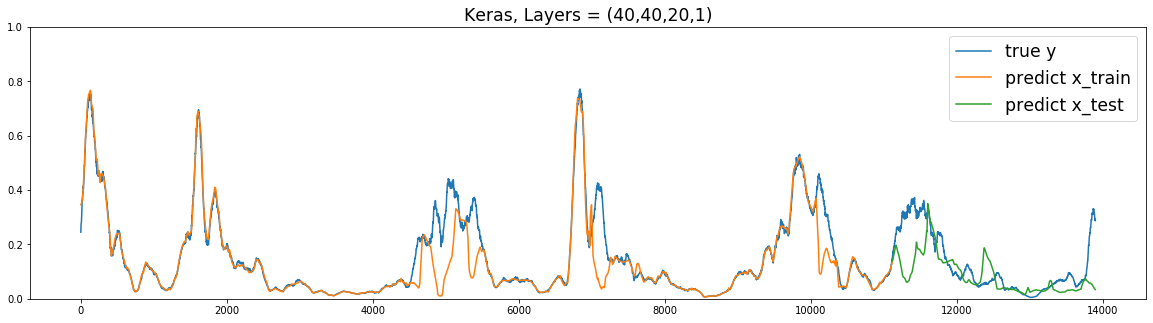

In [289]:
total_length = len(df_y_smooth)
train_length = len(y_train)
x = [i for i in range(total_length)]
# nn.fit(x_train,y_train.values.ravel())
pred = model2.predict(x_test)
pred_unknown = model2.predict(pred_x_smooth)
pred_train = model2.predict(x_train)
plt.figure(figsize=(20, 5))
plt.plot(x,df_y_smooth,label = 'true y')
# plt.plot(x,pred_unknown,label = 'unknown')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')
plt.title('Keras, Layers = (40,40,20,1)',fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.ylim(0, 1)

### Mean Squared Error

In [228]:
mse = mean_squared_error(y_test, pred)
mse

0.00862625551796362

### Mean Absolute Percentage Error

In [229]:
mae = mean_absolute_percentage_error(y_test, pred)
mae

0.5942372108841427

#### Keras, Layers = (50,40,20,1), step size = 0.0005

(0, 1)

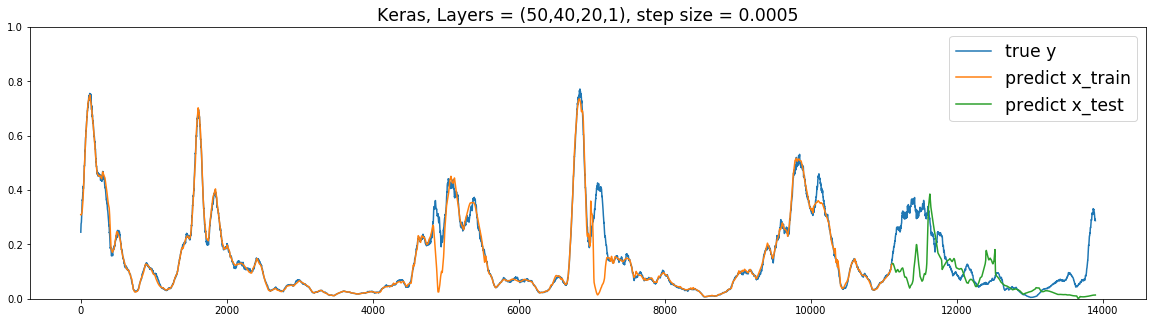

In [288]:
total_length = len(df_y_smooth)
train_length = len(y_train)
x = [i for i in range(total_length)]
# nn.fit(x_train,y_train.values.ravel())
pred = model4.predict(x_test)
pred_unknown = model4.predict(pred_x_smooth)
pred_train = model4.predict(x_train)
plt.figure(figsize=(20, 5))
plt.plot(x,df_y_smooth,label = 'true y')
# plt.plot(x,pred_unknown,label = 'unknown')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')
plt.title('Keras, Layers = (50,40,20,1), step size = 0.0005',fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.ylim(0, 1)

In [237]:
mse = mean_squared_error(y_test, pred)
mse

0.012161054754176864

In [238]:
mae = mean_absolute_percentage_error(y_test, pred)
mae

0.686753437506146

#### MLP, Layers = (10,10,10,1)

C:\Users\eric_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0, 1)

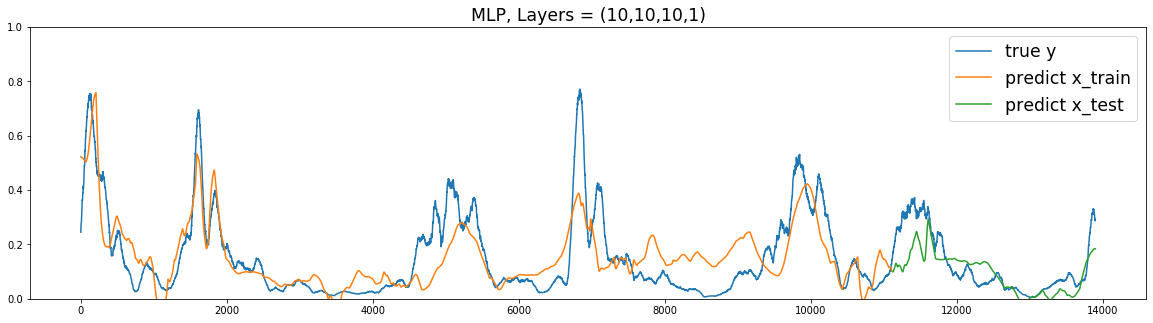

In [386]:
total_length = len(df_y_smooth)
train_length = len(y_train)
x = [i for i in range(total_length)]
nn.fit(x_train,y_train.values.ravel())
pred = nn.predict(x_test)
pred_train = nn.predict(x_train)
pred_unknown = nn.predict(pred_x_smooth)
plt.figure(figsize=(20, 5))
plt.plot(x,df_y_smooth,label = 'true y')
# plt.plot(x,pred_unknown,label = 'unknown')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')
plt.legend(fontsize = 'xx-large')
plt.title('MLP, Layers = (10,10,10,1)',fontsize = 'xx-large')
plt.ylim(0, 1)

In [387]:
mse = mean_squared_error(y_test, pred)
mse

0.005907386531176653

In [388]:
mae = mean_absolute_percentage_error(y_test, pred)
mae

1.837715477548415

#### MLP, Layers = (25,25,25,1)

(0, 1)

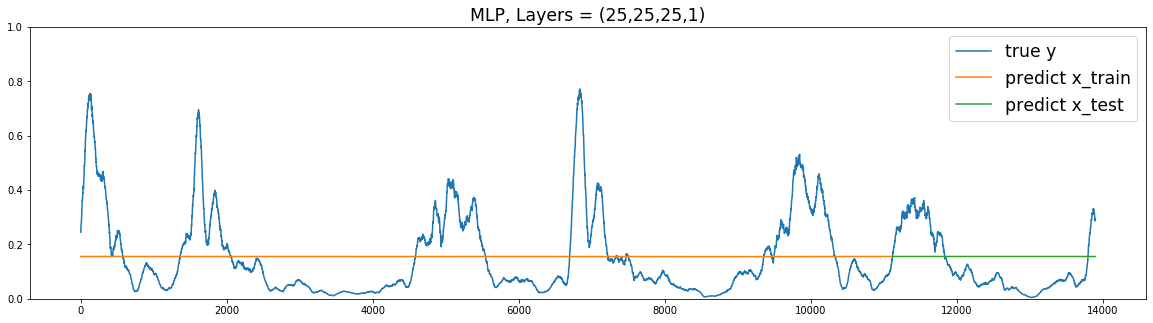

In [286]:
total_length = len(df_y_smooth)
train_length = len(y_train)
x = [i for i in range(total_length)]
nn2.fit(x_train,y_train.values.ravel())
pred = nn2.predict(x_test)
pred_unknown = nn2.predict(pred_x_smooth)
pred_train = nn2.predict(x_train)
plt.figure(figsize=(20, 5))
plt.plot(x,df_y_smooth,label = 'true y')
# plt.plot(x,pred_unknown,label = 'unknown')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')
plt.legend(fontsize = 'xx-large')
plt.title('MLP, Layers = (25,25,25,1)',fontsize = 'xx-large')
plt.ylim(0, 1)

In [67]:
mse = mean_squared_error(y_test, pred)
mse

0.45553060751531105

In [72]:
mae = mean_absolute_percentage_error(y_test, pred)
mae

1.470988510677644

# Linear Regression

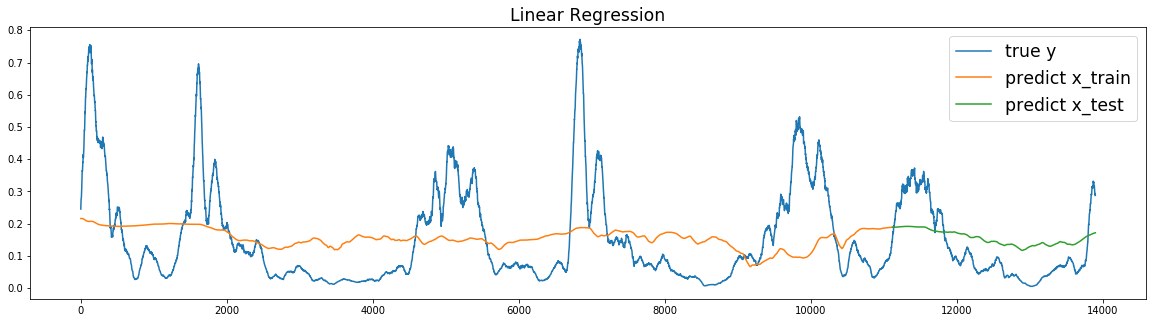

In [305]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train.values.ravel())
pred_train = reg.predict(x_train)
pred = reg.predict(x_test)
plt.figure(figsize=(20, 5))
plt.plot(x,df_y_smooth,label = 'true y')
plt.plot(x[:train_length], pred_train, label = 'predict x_train')
plt.plot(x[train_length:], pred, label = 'predict x_test')
plt.title('Linear Regression',fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')

In [303]:
mse = mean_squared_error(y_test, pred)
mse

0.008722063637581842

In [304]:
mae = mean_absolute_percentage_error(y_test, pred)
mae

2.6375338588419757

In [254]:
reg.coef_

array([ 0.07391655, -0.13656476, -0.06611762])